# Predicting Euro 2024 Winner

##### Dataset: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017/code

## Load the Data

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
abspath='/content/drive/My Drive/Colab Notebooks/DS for Sports/project/'
data=pd.read_csv(abspath+'/results.csv')
# read data from where you have stored it locally

In [ ]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47917 non-null  object
 1   home_team   47917 non-null  object
 2   away_team   47917 non-null  object
 3   home_score  47917 non-null  int64 
 4   away_score  47917 non-null  int64 
 5   tournament  47917 non-null  object
 6   city        47917 non-null  object
 7   country     47917 non-null  object
 8   neutral     47917 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


## Subsetting the Data

We have results from 1872. We do not need the entire history of results. So we will focus on the results from the last 5 years.

Euro 2024 competition started on 14th June 2024.So, we will subset results
from June 13th 2019 to June 13th 202



Also, we will focus only on teams that are playing in the tournament.

#### Defining the teams playing in Euro 2024

In [ ]:
# Define the list of Euro 2024 teams
euro_teams = [
    "Albania", "Scotland", "Hungary", "Romania",
    "Germany", "Slovakia", "England", "Czech Republic",
    "Austria", "Slovenia", "Italy", "Serbia",
    "Belgium", "Spain", "Netherlands", "Switzerland",
    "Croatia", "France", "Poland", "Turkey",
    "Denmark", "Georgia", "Portugal", "Ukraine"
]

#### Setting the date to get last 5 years results

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
start_date_filter = pd.Timestamp("2019-06-13")
end_date_filter = pd.Timestamp("2024-06-13")

# Filter the data for matches in the specified range and only for Euro 2024 teams
euro_2024 = data[
    (data['date'] >= start_date_filter) &
    (data['date'] <= end_date_filter) &
    (data['home_team'].isin(euro_teams) | data['away_team'].isin(euro_teams))
]

In [ ]:
euro_2024.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
42760,2019-09-05,South Korea,Georgia,2,2,Friendly,Istanbul,Turkey,True
42761,2019-09-05,Montenegro,Hungary,2,1,Friendly,Podgorica,Montenegro,False
42765,2019-09-05,Republic of Ireland,Switzerland,1,1,UEFA Euro qualification,Dublin,Republic of Ireland,False
42766,2019-09-05,Gibraltar,Denmark,0,6,UEFA Euro qualification,Gibraltar,Gibraltar,False
42769,2019-09-05,Romania,Spain,1,2,UEFA Euro qualification,Bucharest,Romania,False


In [ ]:
euro_2024.tail()
# Last match is just before euro 2024 tournament started.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47238,2024-06-10,Czech Republic,North Macedonia,2,1,Friendly,Hradec Králové,Czech Republic,False
47239,2024-06-10,Netherlands,Iceland,4,0,Friendly,Rotterdam,Netherlands,False
47240,2024-06-10,Poland,Turkey,2,1,Friendly,Warsaw,Poland,False
47257,2024-06-11,Moldova,Ukraine,0,4,Friendly,Chișinău,Moldova,False
47259,2024-06-11,Portugal,Republic of Ireland,3,0,Friendly,Aveiro,Portugal,False


In [ ]:
start_date_filter = pd.Timestamp("2024-06-14")
end_date_filter = pd.Timestamp("2024-07-14")

# Filter the matches that happened in the actual tournament. This will be the Test dataset fo our prediction.
tournament = data[
    (data['date'] >= start_date_filter) &
    (data['date'] <= end_date_filter) &
    (data['home_team'].isin(euro_teams) | data['away_team'].isin(euro_teams))
]

In [ ]:
tournament.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47300,2024-06-14,Germany,Scotland,5,1,UEFA Euro,Munich,Germany,False
47303,2024-06-15,Hungary,Switzerland,1,3,UEFA Euro,Cologne,Germany,True
47304,2024-06-15,Spain,Croatia,3,0,UEFA Euro,Berlin,Germany,True
47305,2024-06-15,Italy,Albania,2,1,UEFA Euro,Dortmund,Germany,True
47309,2024-06-16,Slovenia,Denmark,1,1,UEFA Euro,Stuttgart,Germany,True


In [ ]:
tournament.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
47390,2024-07-06,England,Switzerland,1,1,UEFA Euro,Düsseldorf,Germany,True
47391,2024-07-06,Netherlands,Turkey,2,1,UEFA Euro,Berlin,Germany,True
47394,2024-07-09,Spain,France,2,1,UEFA Euro,Munich,Germany,True
47396,2024-07-10,Netherlands,England,1,2,UEFA Euro,Dortmund,Germany,True
47399,2024-07-14,Spain,England,2,1,UEFA Euro,Berlin,Germany,True


In [ ]:
tournament.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 47300 to 47399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        51 non-null     datetime64[ns]
 1   home_team   51 non-null     object        
 2   away_team   51 non-null     object        
 3   home_score  51 non-null     int64         
 4   away_score  51 non-null     int64         
 5   tournament  51 non-null     object        
 6   city        51 non-null     object        
 7   country     51 non-null     object        
 8   neutral     51 non-null     bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.6+ KB


## EDA

How many matches have each team participating in Euro 2024 played over the last 5 years?

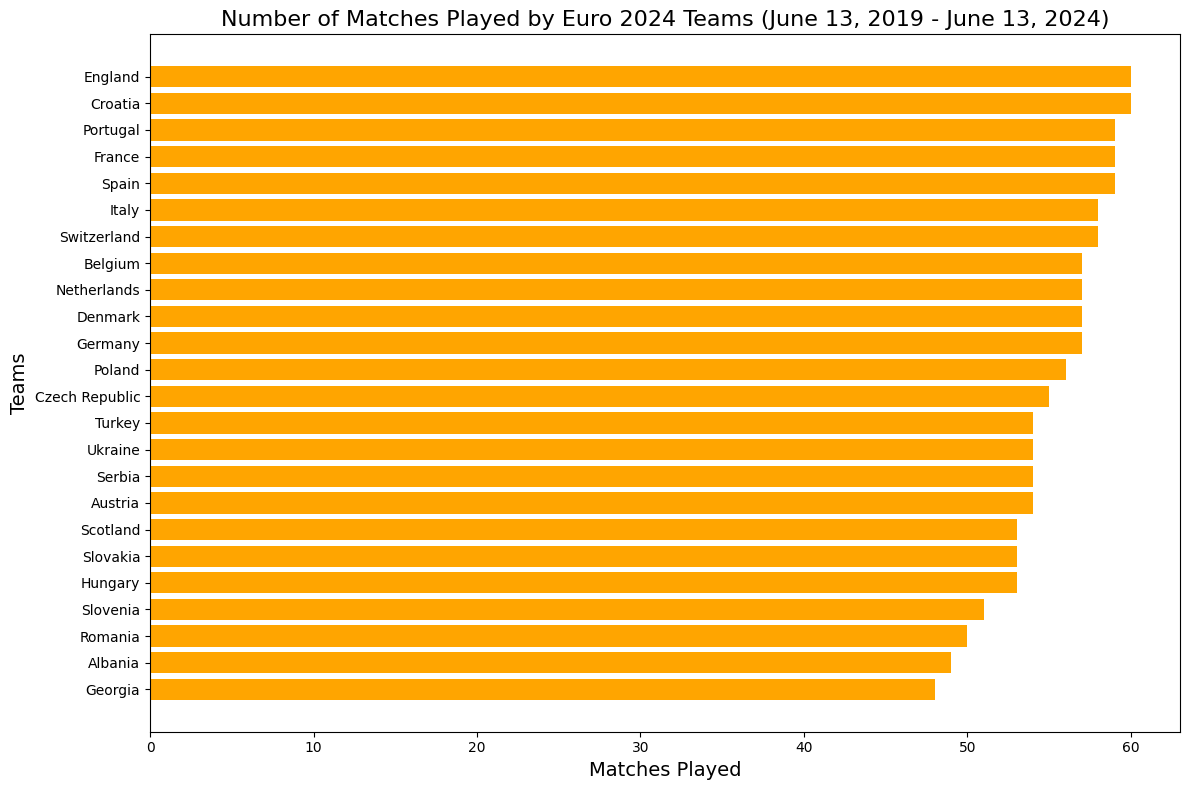

In [ ]:

matches_played = (
    pd.concat([euro_2024['home_team'], euro_2024['away_team']])
    .value_counts()
    .loc[euro_teams]
    .sort_values(ascending=False)
)

# Prepare data for visualization
matches_played_df = matches_played.reset_index()
matches_played_df.columns = ['Team', 'Matches Played']

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(matches_played_df['Team'], matches_played_df['Matches Played'], color='orange')
plt.title("Number of Matches Played by Euro 2024 Teams (June 13, 2019 - June 13, 2024)", fontsize=16)
plt.xlabel("Matches Played", fontsize=14)
plt.ylabel("Teams", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.tight_layout()
plt.show()


In [ ]:
matches_played

,count
England,60
Croatia,60
Portugal,59
France,59
Spain,59
Italy,58
Switzerland,58
Belgium,57
Netherlands,57
Denmark,57


###### Most teams have played equal number of games.

## ELO Ranking System

The Teams playing in Euro 2024 have played different types of tournaments over the past 5 years. So, we have assigned different K values based on the importance of the tournament. The starting ELO is set at 1500

In [ ]:
print(euro_2024['tournament'].unique())
print(euro_2024['tournament'].nunique())

['Friendly' 'UEFA Euro qualification' 'UEFA Nations League'
 'FIFA World Cup qualification' 'Kirin Challenge Cup' 'UEFA Euro'
 'CONMEBOL–UEFA Cup of Champions' 'FIFA World Cup' 'FIFA Series']
9


In [ ]:
k_factors = {
    "UEFA Euro": 40,
    "FIFA World Cup": 50,
    "UEFA Nations League": 30,
    "Friendly": 20,
    "UEFA Euro qualification": 35,
    "FIFA World Cup qualification": 35,
    "CONMEBOL–UEFA Cup of Champions": 50,
    "Kirin Challenge Cup": 10,
    "FIFA Series": 10
}

# Initialize Elo ratings for Euro 2024 teams
elo_ratings = {team: 1500 for team in euro_teams}

# Define the home advantage
# data['home_advantage'] = data.apply(
#     lambda row: 100 if row['home_team'] == row['country'] else 0, axis=1
# )
home_advantage = 100

# Sort matches by date
euro_2024 = euro_2024.sort_values(by='date')

# Elo rating update function
def calculate_elo_rating(team1, team2, score1, score2, k_factor, home_team=True):
    # Current ratings
    R1 = elo_ratings[team1] + (home_advantage if home_team else 0)
    R2 = elo_ratings[team2]

    # Calculate expected scores
    E1 = 1 / (1 + 10 ** ((R2 - R1) / 400))
    E2 = 1 / (1 + 10 ** ((R1 - R2) / 400))

    # Determine match result
    S1 = 1 if score1 > score2 else 0.5 if score1 == score2 else 0
    S2 = 1 - S1

    # Update Elo ratings
    elo_ratings[team1] += k_factor * (S1 - E1)
    elo_ratings[team2] += k_factor * (S2 - E2)

# Process each match
for _, row in euro_2024.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    tournament = row['tournament']

    # Skip matches where one of the teams is not in Euro 2024
    if home_team not in euro_teams or away_team not in euro_teams:
        continue

    # Get the K-factor for the tournament
    k_factor = k_factors.get(tournament, 20)  # Default K-factor is 20

    # Update ratings
    calculate_elo_rating(home_team, away_team, home_score, away_score, k_factor, home_team=True)

# Convert Elo ratings to a DataFrame and display them
elo_ratings_df = pd.DataFrame(list(elo_ratings.items()), columns=['Team', 'Elo Rating'])
elo_ratings_df = elo_ratings_df.sort_values(by='Elo Rating', ascending=False)
elo_ratings_df


,Team,Elo Rating
17,France,1625.092058
13,Spain,1622.991806
12,Belgium,1578.306852
6,England,1567.348930
10,Italy,1565.734905
16,Croatia,1561.262321
22,Portugal,1546.423587
20,Denmark,1541.263224
2,Hungary,1523.801762
4,Germany,1507.472240


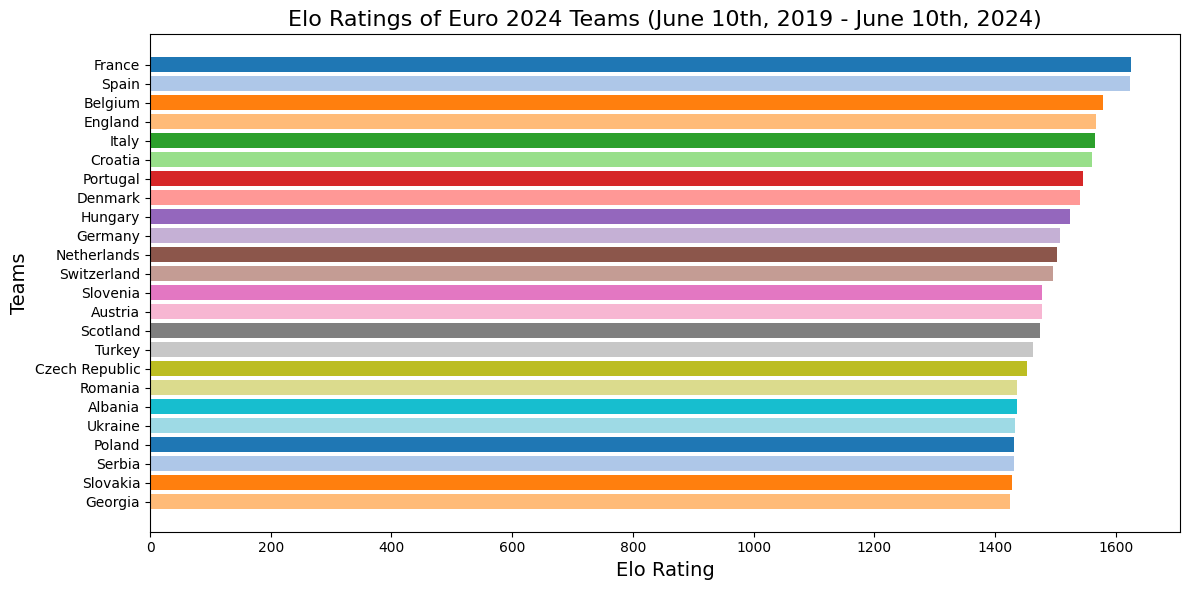

In [ ]:

# Prepare data for visualization
teams = elo_ratings_df['Team']
ratings = elo_ratings_df['Elo Rating']

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(teams, ratings, color=plt.cm.tab20.colors)
plt.xlabel("Elo Rating", fontsize=14)
plt.ylabel("Teams", fontsize=14)
plt.title("Elo Ratings of Euro 2024 Teams (June 10th, 2019 - June 10th, 2024)", fontsize=16)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

#### According to our ELO Ranking system, `France`,`Spain`,`Belgium`,`England`, `Italy` are the top rated teams in the tournament based on their previous performances in various tournaments.

## Average Goals Scored and Conceded

To get a better idea of how many goals each team scores and conceded, we will calcualte this metric to see if a team outscores their opponent or not. This will also tell us if a team has a good offense and defense or not.

In [ ]:
# Initialize stats for teams
team_stats = {team: {"Goals_Scored": 0, "Goals_Conceded": 0, "Matches_Played": 0} for team in euro_teams}

# Aggregate goals scored and conceded for each team
for _, match in euro_2024.iterrows():
    home_team = match['home_team']
    away_team = match['away_team']
    home_score = match['home_score']
    away_score = match['away_score']

    # Update stats for home team
    if home_team in euro_teams:
        team_stats[home_team]["Goals_Scored"] += home_score
        team_stats[home_team]["Goals_Conceded"] += away_score
        team_stats[home_team]["Matches_Played"] += 1

    # Update stats for away team
    if away_team in euro_teams:
        team_stats[away_team]["Goals_Scored"] += away_score
        team_stats[away_team]["Goals_Conceded"] += home_score
        team_stats[away_team]["Matches_Played"] += 1

# Compute average goals per match across all teams
total_goals = sum(stat["Goals_Scored"] for stat in team_stats.values())
total_matches = sum(stat["Matches_Played"] for stat in team_stats.values())
average_goals_per_match = total_goals / total_matches if total_matches > 0 else 1

xg_defense_stats = []
for team, stats in team_stats.items():
    matches_played = stats["Matches_Played"]
    if matches_played > 0:
        xg = stats["Goals_Scored"] / matches_played / average_goals_per_match
        defensive_power = stats["Goals_Conceded"] / matches_played / average_goals_per_match
    else:
        xg = 0
        defensive_power = float('inf')  # If no matches, set to very high defensive power (poor defense)
    xg_defense_stats.append({
        "Team": team,
        "Average Goals For": xg,
        "Average Goals Conceded": defensive_power,
        "Matches Played": matches_played
    })

# Convert to DataFrame for better display
average_goals = pd.DataFrame(xg_defense_stats).sort_values(by="Average Goals For", ascending=False)

average_goals

,Team,Average Goals For,Average Goals Conceded,Matches Played
22,Portugal,1.402471,0.389073,59
12,Belgium,1.292464,0.440187,57
6,England,1.290122,0.338101,60
14,Netherlands,1.264367,0.496381,57
17,France,1.230555,0.443362,59
13,Spain,1.230555,0.380024,59
4,Germany,1.189441,0.702426,57
20,Denmark,1.105150,0.402724,57
10,Italy,1.104504,0.404985,58
11,Serbia,0.998485,0.612932,54


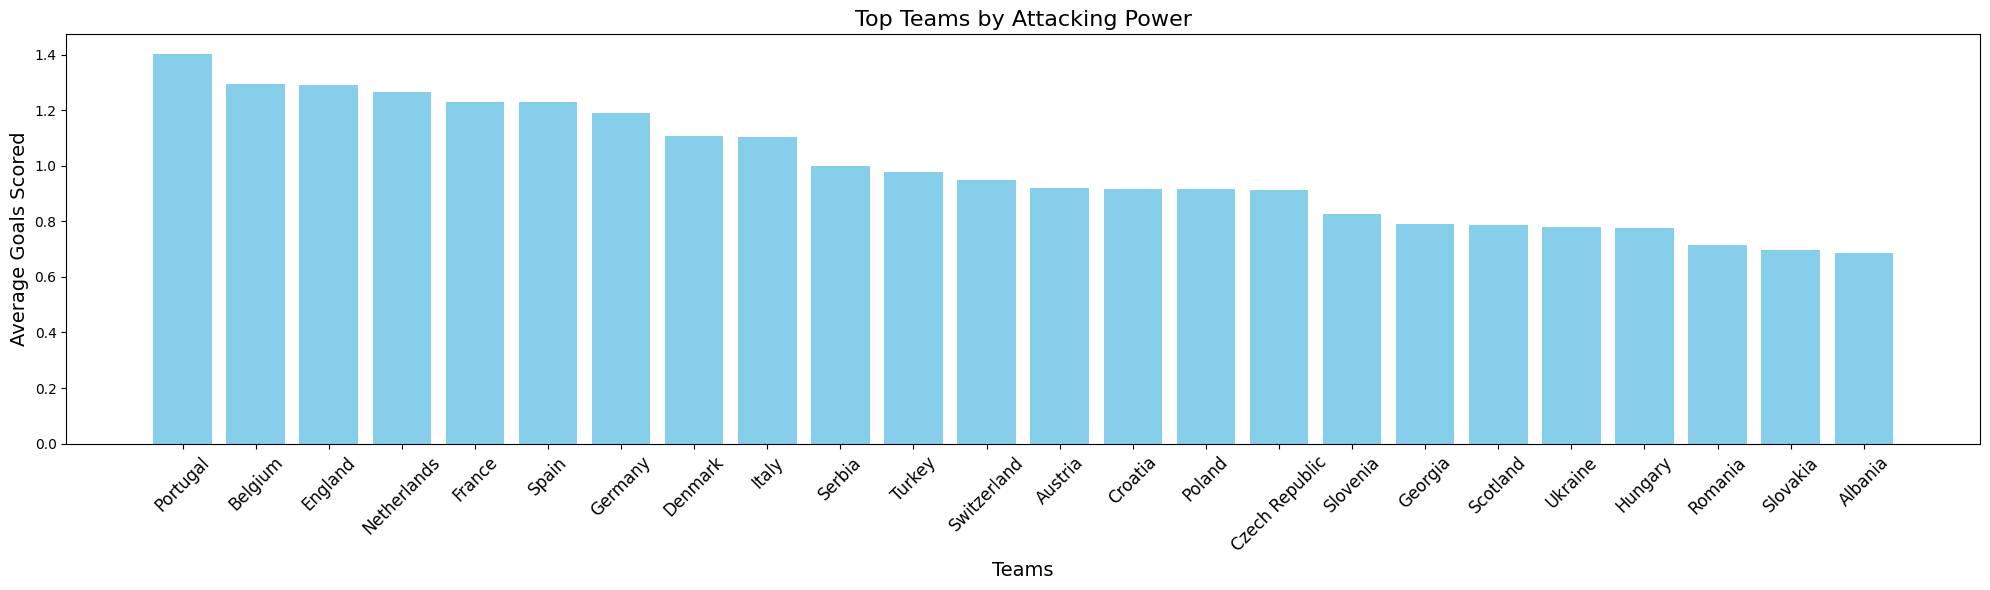

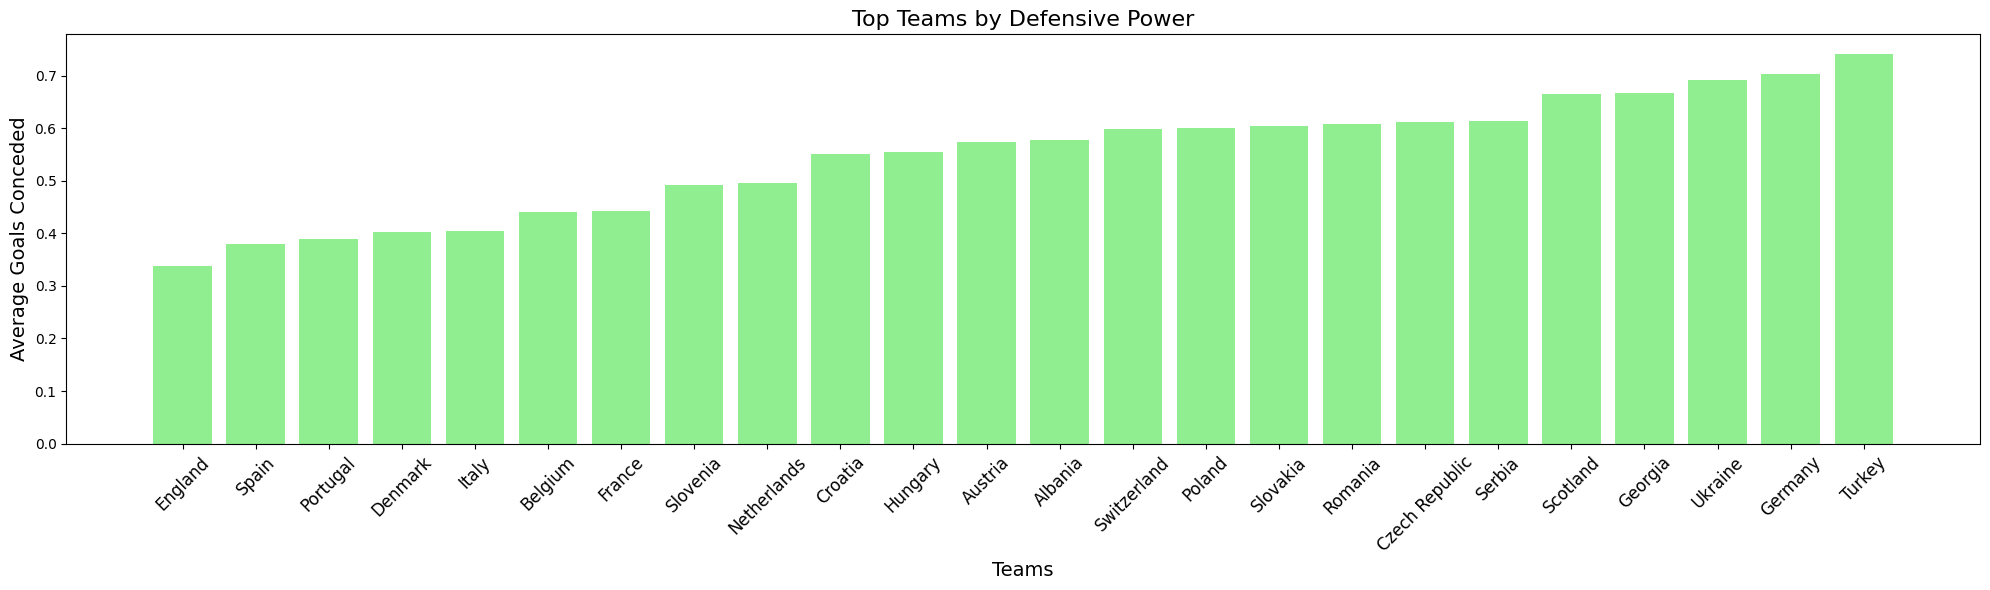

In [ ]:
import matplotlib.pyplot as plt

# Extract the top teams for visualization
top_xg_teams = average_goals.nlargest(24, "Average Goals For")
top_defensive_teams = average_goals.nsmallest(24, "Average Goals Conceded")

# Plot average goals for top teams
plt.figure(figsize=(20, 6))
plt.bar(top_xg_teams["Team"], top_xg_teams["Average Goals For"], color='skyblue')
plt.title("Top Teams by Attacking Power", fontsize=16)
plt.xlabel("Teams", fontsize=14)
plt.ylabel("Average Goals Scored", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Plot Defensive Power for top teams
plt.figure(figsize=(20, 6))
plt.bar(top_defensive_teams["Team"], top_defensive_teams["Average Goals Conceded"], color='lightgreen')
plt.title("Top Teams by Defensive Power", fontsize=16)
plt.xlabel("Teams", fontsize=14)
plt.ylabel("Average Goals Conceded", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

#### 1. From the visualization, we can see that teams like Portugal, England, Spain, Italy, and Belgium score a lot of goals in the matches.

#### 2.  England, Spain, Portugal, and Italy also concede less.

#### These are good indicators to see which team might do well.

#### Lastly, we can see that teams that have a higher ELO Rating concede less goals and score more goals.

## Merging the Two Datasets

##### We have merged the two datasets on ELO Ratings and Average Goals Scored and Conceded into one dataframe.

In [ ]:
final_data = average_goals.merge(elo_ratings_df, how='inner', on='Team')
final_data

,Team,Average Goals For,Average Goals Conceded,Matches Played,Elo Rating
0,Portugal,1.402471,0.389073,59,1546.423587
1,Belgium,1.292464,0.440187,57,1578.306852
2,England,1.290122,0.338101,60,1567.348930
3,Netherlands,1.264367,0.496381,57,1503.397168
4,France,1.230555,0.443362,59,1625.092058
5,Spain,1.230555,0.380024,59,1622.991806
6,Germany,1.189441,0.702426,57,1507.472240
7,Denmark,1.105150,0.402724,57,1541.263224
8,Italy,1.104504,0.404985,58,1565.734905
9,Serbia,0.998485,0.612932,54,1430.847291


## Predicting EURO Match Results By Poisson Distribution

The Poisson distribution models football match outcomes by predicting the number of goals based on average goals scored, conceded, and Elo ratings. Expected goals are calculated for each team using:



The Elo adjustment factor ( accounts for team strength. Probabilities of outcomes (win, draw, loss) are derived by simulating goal combinations with the Poisson formula. This approach is efficient and data-driven but assumes independence and fixed scoring rates.







### Setting up All Groups

#### Setting up the groups as they were in EURO tournament

In [ ]:
# Define the matches data with corrected column names
matches_data = [
    # Group A
    {"Group": "A", "Home_Team": "Germany", "Away_Team": "Scotland"},
    {"Group": "A", "Home_Team": "Hungary", "Away_Team": "Switzerland"},
    {"Group": "A", "Home_Team": "Germany", "Away_Team": "Hungary"},
    {"Group": "A", "Home_Team": "Scotland", "Away_Team": "Switzerland"},
    {"Group": "A", "Home_Team": "Switzerland", "Away_Team": "Germany"},
    {"Group": "A", "Home_Team": "Scotland", "Away_Team": "Hungary"},
    # Group B
    {"Group": "B", "Home_Team": "Spain", "Away_Team": "Croatia"},
    {"Group": "B", "Home_Team": "Italy", "Away_Team": "Albania"},
    {"Group": "B", "Home_Team": "Croatia", "Away_Team": "Albania"},
    {"Group": "B", "Home_Team": "Spain", "Away_Team": "Italy"},
    {"Group": "B", "Home_Team": "Albania", "Away_Team": "Spain"},
    {"Group": "B", "Home_Team": "Croatia", "Away_Team": "Italy"},
    # Group C
    {"Group": "C", "Home_Team": "Slovenia", "Away_Team": "Denmark"},
    {"Group": "C", "Home_Team": "Serbia", "Away_Team": "England"},
    {"Group": "C", "Home_Team": "Slovenia", "Away_Team": "Serbia"},
    {"Group": "C", "Home_Team": "Denmark", "Away_Team": "England"},
    {"Group": "C", "Home_Team": "England", "Away_Team": "Slovenia"},
    {"Group": "C", "Home_Team": "Denmark", "Away_Team": "Serbia"},
    # Group D
    {"Group": "D", "Home_Team": "Poland", "Away_Team": "Netherlands"},
    {"Group": "D", "Home_Team": "Austria", "Away_Team": "France"},
    {"Group": "D", "Home_Team": "Poland", "Away_Team": "Austria"},
    {"Group": "D", "Home_Team": "Netherlands", "Away_Team": "France"},
    {"Group": "D", "Home_Team": "Netherlands", "Away_Team": "Austria"},
    {"Group": "D", "Home_Team": "France", "Away_Team": "Poland"},
    # Group E
    {"Group": "E", "Home_Team": "Romania", "Away_Team": "Ukraine"},
    {"Group": "E", "Home_Team": "Belgium", "Away_Team": "Slovakia"},
    {"Group": "E", "Home_Team": "Slovakia", "Away_Team": "Ukraine"},
    {"Group": "E", "Home_Team": "Belgium", "Away_Team": "Romania"},
    {"Group": "E", "Home_Team": "Slovakia", "Away_Team": "Romania"},
    {"Group": "E", "Home_Team": "Ukraine", "Away_Team": "Belgium"},
    # Group F
    {"Group": "F", "Home_Team": "Turkey", "Away_Team": "Georgia"},
    {"Group": "F", "Home_Team": "Portugal", "Away_Team": "Czech Republic"},
    {"Group": "F", "Home_Team": "Georgia", "Away_Team": "Czech Republic"},
    {"Group": "F", "Home_Team": "Turkey", "Away_Team": "Portugal"},
    {"Group": "F", "Home_Team": "Georgia", "Away_Team": "Portugal"},
    {"Group": "F", "Home_Team": "Czech Republic", "Away_Team": "Turkey"},
]

# Create a DataFrame
matches_df = pd.DataFrame(matches_data)

matches_df


,Group,Home_Team,Away_Team
0,A,Germany,Scotland
1,A,Hungary,Switzerland
2,A,Germany,Hungary
3,A,Scotland,Switzerland
4,A,Switzerland,Germany
5,A,Scotland,Hungary
6,B,Spain,Croatia
7,B,Italy,Albania
8,B,Croatia,Albania
9,B,Spain,Italy


### Group Stage Results

##### As mentioned earlier, we take the Average goals, Elo ratings, home and away teams to calculate `lambda_home` and `lambda_away`. We will also calculate the points and update Elo Ratings after each match.

##### We have also kept a boolean value `is_knockout` which will determine the winner based on higher ELO Rating if the match is predicted to end in a draw in knockouts.

In [ ]:
import numpy as np
def predict_match(home_team, away_team, average_goals, elo_ratings_df, is_knockout=False, k_factor=60):
    """
    Simulates a match outcome with Elo rating updates and resolves draws in knockouts.

    Args:
        home_team (str): Home team name.
        away_team (str): Away team name.
        average_goals (pd.DataFrame): DataFrame with teams' average goals for and against.
        elo_ratings_df (pd.DataFrame): DataFrame with teams' Elo ratings.
        is_knockout (bool): Whether the match is a knockout match.
        k_factor (int): K-factor for Elo rating adjustments.

    Returns:
        tuple: (home_points, away_points, home_win_prob, draw_prob, away_win_prob, updated_elo_ratings_df)
    """
    # Retrieve average goals data
    home_data = average_goals[average_goals['Team'] == home_team].iloc[0]
    away_data = average_goals[average_goals['Team'] == away_team].iloc[0]

    # Retrieve and calculate Elo ratings
    elo_home = elo_ratings_df.loc[elo_ratings_df['Team'] == home_team, 'Elo Rating'].iloc[0]
    elo_away = elo_ratings_df.loc[elo_ratings_df['Team'] == away_team, 'Elo Rating'].iloc[0]
    elo_factor = 10 ** ((elo_home - elo_away) / 400)

    # Calculate expected goals
    lambda_home = home_data['Average Goals For'] * away_data['Average Goals Conceded'] * elo_factor
    lambda_away = away_data['Average Goals For'] * home_data['Average Goals Conceded'] / elo_factor

    # Simulate probabilities
    max_goals = 10
    home_win_prob = 0
    draw_prob = 0
    away_win_prob = 0

    for home_goals in range(max_goals):
        for away_goals in range(max_goals):
            prob_home = (np.exp(-lambda_home) * lambda_home ** home_goals) / np.math.factorial(home_goals)
            prob_away = (np.exp(-lambda_away) * lambda_away ** away_goals) / np.math.factorial(away_goals)
            match_prob = prob_home * prob_away

            if home_goals > away_goals:
                home_win_prob += match_prob
            elif home_goals == away_goals:
                draw_prob += match_prob
            else:
                away_win_prob += match_prob

    # Determine points for group stages or winner for knockouts
    if home_win_prob > max(draw_prob, away_win_prob):
        home_points, away_points = 3, 0
        home_result, away_result = 1, 0
    elif away_win_prob > max(home_win_prob, draw_prob):
        home_points, away_points = 0, 3
        home_result, away_result = 0, 1
    else:  # Draw case
        if is_knockout:
             # Calculate combined metric for both teams
            home_combined = home_data['Average Goals Conceded']
            away_combined = away_data['Average Goals Conceded']

            # Assign winner based on higher combined metric
            winner = home_team if home_combined < away_combined else away_team
            # print(f"DEBUG: Knockout Draw Resolved by Combined Metric. Winner: {winner}")
            home_points, away_points = (3, 0) if winner == home_team else (0, 3)
            home_result, away_result = (1, 0) if winner == home_team else (0, 1)
        else:
            home_points, away_points = 1, 1
            home_result, away_result = 0.5, 0.5


    # Update Elo ratings
    expected_home = 1 / (1 + 10 ** ((elo_away - elo_home) / 400))
    expected_away = 1 - expected_home
    elo_home_new = elo_home + k_factor * (home_result - expected_home)
    elo_away_new = elo_away + k_factor * (away_result - expected_away)

    # Update Elo ratings in the DataFrame
    elo_ratings_df.loc[elo_ratings_df['Team'] == home_team, 'Elo Rating'] = elo_home_new
    elo_ratings_df.loc[elo_ratings_df['Team'] == away_team, 'Elo Rating'] = elo_away_new

    return home_points, away_points, home_win_prob, draw_prob, away_win_prob, elo_ratings_df


In [ ]:
def simulate_group_stage_with_probabilities(matches_df, average_goals, elo_ratings_df):
    """
    Simulates the group stage, calculating points, expected goals scored/conceded, and match probabilities.

    Args:
        matches_df (pd.DataFrame): DataFrame containing the group stage matchups.
        average_goals (pd.DataFrame): DataFrame with teams' average goals for and against.
        elo_ratings_df (pd.DataFrame): DataFrame with teams' Elo ratings.

    Returns:
        final_standings_df (pd.DataFrame): Standings with points, expected goals scored, and conceded.
        results_df (pd.DataFrame): Match results with win/draw probabilities.
    """
    # Initialize a dictionary for cumulative standings
    group_standings = {}
    results = []

    for _, match in matches_df.iterrows():
        group = match['Group']
        home_team = match['Home_Team']
        away_team = match['Away_Team']

        # Ensure teams exist in the data
        if home_team not in average_goals['Team'].values or away_team not in average_goals['Team'].values:
            raise ValueError(f"Team {home_team} or {away_team} not found in average_goals")

        # Simulate match points and expected goals
        home_points, away_points, home_win_prob, draw_prob, away_win_prob,elo_ratings_df = predict_match(
            home_team, away_team, average_goals, elo_ratings_df,is_knockout=False, k_factor=60)


        # # Debug predict_match outputs
        # print(f"DEBUG: Home Team={home_team}, Away Team={away_team}, Home Points={home_points}, Away Points={away_points}")

        # Calculate expected goals
        home_data = average_goals[average_goals['Team'] == home_team].iloc[0]
        away_data = average_goals[average_goals['Team'] == away_team].iloc[0]
        elo_home = elo_ratings_df[elo_ratings_df['Team'] == home_team]['Elo Rating'].iloc[0]
        elo_away = elo_ratings_df[elo_ratings_df['Team'] == away_team]['Elo Rating'].iloc[0]
        elo_factor = 10 ** ((elo_home - elo_away) / 400)
        lambda_home = home_data['Average Goals For'] * away_data['Average Goals Conceded'] * elo_factor
        lambda_away = away_data['Average Goals For'] * home_data['Average Goals Conceded'] / elo_factor

        # Update cumulative standings
        for team, points, scored, conceded in [
            (home_team, home_points, lambda_home, lambda_away),
            (away_team, away_points, lambda_away, lambda_home),
        ]:
            if team not in group_standings:
                group_standings[team] = {'Group': group, 'Team': team, 'Points': 0, 'Expected Goals Scored': 0, 'Expected Goals Conceded': 0}
            group_standings[team]['Points'] += int(points)
            group_standings[team]['Expected Goals Scored'] += scored
            group_standings[team]['Expected Goals Conceded'] += conceded

        # Append results
        results.append({
            'Group': group,
            'Home Team': home_team,
            'Away Team': away_team,
            'Home Win Probability': home_win_prob,
            'Draw Probability': draw_prob,
            'Away Win Probability': away_win_prob
        })

    # Convert standings to DataFrame
    final_standings_df = pd.DataFrame.from_dict(group_standings, orient='index').reset_index(drop=True)

    # Convert match results to DataFrame
    results_df = pd.DataFrame(results)

    return final_standings_df, results_df

final_standings_df, results_df = simulate_group_stage_with_probabilities(matches_df, average_goals, elo_ratings_df)

In [ ]:
final_standings_df

,Group,Team,Points,Expected Goals Scored,Expected Goals Conceded
0,A,Germany,5,2.755186,1.481095
1,A,Scotland,0,0.784283,3.625653
2,A,Hungary,5,2.223267,1.351317
3,A,Switzerland,5,2.231436,1.536108
4,B,Spain,7,5.305066,0.550230
5,B,Croatia,4,1.828014,2.153967
6,B,Italy,5,2.707338,1.093612
7,B,Albania,0,0.311720,6.354330
8,C,Slovenia,1,0.892477,3.163867
9,C,Denmark,7,3.372430,0.882939


###### This dataframe has all the final points and expected goals scored and conceded after all the group stage matches have been completed.

In [ ]:
results_df

,Group,Home Team,Away Team,Home Win Probability,Draw Probability,Away Win Probability
0,A,Germany,Scotland,0.467271,0.361760,0.170969
1,A,Hungary,Switzerland,0.299739,0.466777,0.233484
2,A,Germany,Hungary,0.358619,0.412794,0.228587
3,A,Scotland,Switzerland,0.145424,0.398855,0.455720
4,A,Switzerland,Germany,0.270669,0.384841,0.344490
5,A,Scotland,Hungary,0.095470,0.385720,0.518809
6,B,Spain,Croatia,0.536055,0.372016,0.091929
7,B,Italy,Albania,0.694480,0.270514,0.035005
8,B,Croatia,Albania,0.584979,0.348714,0.066306
9,B,Spain,Italy,0.417534,0.445589,0.136877


###### This dataframe has all the results of each match of each group with their win, loss, and draw probability.

### Round of 16 Results

##### The Top 2 teams from each group automatically qualify for the Round of 16. The top 4 best third placed team also qualify for the next stage.

##### Getting the Teams that qualified for the next stage

In [ ]:
def get_ro16_teams(final_standings_df):
    """
    Determines the teams advancing to the Round of 16 based on group stage standings.

    Args:
        final_standings_df (pd.DataFrame): DataFrame containing group stage standings.

    Returns:
        ro16_teams (pd.DataFrame): DataFrame containing teams advancing to the Round of 16.
    """
    # Initialize list for Ro16 teams
    ro16_teams = []

    # Get top 2 teams from each group
    grouped = final_standings_df.groupby('Group')
    for group, standings in grouped:
        standings = standings.sort_values(
            by=['Points', 'Expected Goals Scored', 'Expected Goals Conceded'],
            ascending=[False, False, True]
        )
        ro16_teams.extend(standings.head(2).to_dict('records'))  # Add top 2 teams

    # Get third-placed teams
    third_place_teams = grouped.apply(lambda x: x.nlargest(1, 'Points').iloc[2:3])
    third_place_teams = third_place_teams.sort_values(
        by=['Points', 'Expected Goals Scored', 'Expected Goals Conceded'],
        ascending=[False, False, True]
    )
    best_third_place_teams = third_place_teams.head(4).to_dict('records')  # Add best 4 third-placed teams

    # Combine the top 2 teams and best third-placed teams
    ro16_teams.extend(best_third_place_teams)

    # Convert to DataFrame
    ro16_teams_df = pd.DataFrame(ro16_teams)
       # Ensure exactly 16 teams
    if len(ro16_teams_df) < 16:
        remaining_teams = final_standings_df[~final_standings_df['Team'].isin(ro16_teams_df['Team'])]
        remaining_teams = remaining_teams.sort_values(
            by=['Points', 'Expected Goals Scored'],
            ascending=[False, False]
        )
        ro16_teams_df = pd.concat([ro16_teams_df, remaining_teams.head(16 - len(ro16_teams_df))])

    return ro16_teams_df.reset_index(drop=True)

    return ro16_teams_df


# Generate the Round of 16 teams
ro16_teams_df = get_ro16_teams(final_standings_df)



In [ ]:
two_teams = []

    # Get top 2 teams from each group
grouped = final_standings_df.groupby('Group')
for group, standings in grouped:
        standings = standings.sort_values(
            by=['Points', 'Expected Goals Scored', 'Expected Goals Conceded'],
            ascending=[False, False, True]
        )
        two_teams.extend(standings.head(2).to_dict('records'))

In [ ]:
two_teams=pd.DataFrame(two_teams)
two_teams

,Group,Team,Points,Expected Goals Scored,Expected Goals Conceded
0,A,Germany,5,2.755186,1.481095
1,A,Switzerland,5,2.231436,1.536108
2,B,Spain,7,5.305066,0.550230
3,B,Italy,5,2.707338,1.093612
4,C,England,7,4.443356,0.566449
5,C,Denmark,7,3.372430,0.882939
6,D,France,9,7.127962,0.452641
7,D,Netherlands,6,3.057048,1.983260
8,E,Belgium,9,7.745058,0.308247
9,E,Ukraine,2,1.092841,3.994368


In [ ]:
grouped = final_standings_df.groupby('Group')
third_place_teams = grouped.apply(lambda x: x.nlargest(1, 'Points').iloc[2:3])
third_place_teams = third_place_teams.sort_values(
        by=['Points', 'Expected Goals Scored', 'Expected Goals Conceded'],
        ascending=[False, False, True]
    )
best_third_place_teams = third_place_teams.head(4).to_dict('records')

In [ ]:
third=ro16_teams_df[12:15]


In [ ]:
new_row = final_standings_df.iloc[[17]]  # Add the first row from `another_df`
third = pd.concat([third, new_row], ignore_index=True)
third

,Group,Team,Points,Expected Goals Scored,Expected Goals Conceded
0,A,Hungary,5,2.223267,1.351317
1,B,Croatia,4,1.828014,2.153967
2,F,Czech Republic,2,1.434556,3.034637
3,E,Ukraine,2,1.092841,3.994368


##### Now, we have the top 2 teams and the 4 best third placed team. So, we can continue with our Round of 16 result prediction.

In [ ]:
def setup_ro16_matchups(final_standings_df):
    """
    Sets up the Round of 16 matchups based on group standings and tournament rules.

    Args:
        final_standings_df (pd.DataFrame): Group stage final standings including points, goals scored, and goals conceded.

    Returns:
        ro16_teams (pd.DataFrame): DataFrame containing teams advancing to the Round of 16.
        ro16_matchups (list): List of dictionaries representing the Round of 16 matchups.
    """
    # Get top 2 teams from each group
    # grouped = final_standings_df.groupby('Group')
    # top_two_teams = grouped.apply(lambda x: x.nlargest(2, 'Points')).reset_index(drop=True)
    top_two_teams=ro16_teams_df[0:12]
    # top_two_teams.sort_values(by='Expected Goals Scored', ascending=False)


    # Get third-placed teams
    # best_third_place_teams=best_third_place_teams
    best_third_place_teams=third




    # Combine top two teams and best third-placed teams
    ro16_teams = pd.concat([top_two_teams, best_third_place_teams]).reset_index(drop=True)

    # Define the Round of 16 matchups based on UEFA rules
    ro16_matchups = [
        {"Match": 1, "Team 1": top_two_teams[top_two_teams['Group'] == 'A'].iloc[0]['Team'],
         "Team 2": top_two_teams[top_two_teams['Group'] == 'C'].iloc[1]['Team']},# Gemrany vs Denmark

        {"Match": 2, "Team 1": top_two_teams[top_two_teams['Group'] == 'B'].iloc[0]['Team'],
         "Team 2": best_third_place_teams.iloc[1]['Team']},# Spain vs Croatia

        {"Match": 3, "Team 1": top_two_teams[top_two_teams['Group'] == 'C'].iloc[0]['Team'],
         "Team 2": best_third_place_teams.iloc[2]['Team']}, # Engalnd vs Turkey

        {"Match": 4, "Team 1": top_two_teams[top_two_teams['Group'] == 'D'].iloc[0]['Team'],
         "Team 2": top_two_teams[top_two_teams['Group'] == 'F'].iloc[1]['Team']}, # France vs Check republic

        {"Match": 5, "Team 1": top_two_teams[top_two_teams['Group'] == 'E'].iloc[0]['Team'],
         "Team 2": best_third_place_teams.iloc[0]['Team']}, # Belgium vs Hungary

        {"Match": 6, "Team 1": top_two_teams[top_two_teams['Group'] == 'F'].iloc[0]['Team'],
         "Team 2": best_third_place_teams.iloc[3]['Team']},# portugal vs Slovakia

        {"Match": 7, "Team 1": top_two_teams[top_two_teams['Group'] == 'A'].iloc[1]['Team'],
         "Team 2": top_two_teams[top_two_teams['Group'] == 'B'].iloc[1]['Team']},# Switzerland vs Italy

        {"Match": 8, "Team 1": top_two_teams[top_two_teams['Group'] == 'D'].iloc[1]['Team'],
         "Team 2": top_two_teams[top_two_teams['Group'] == 'E'].iloc[1]['Team']}] #Netherland vs Romania


    return ro16_teams, ro16_matchups


def simulate_round_of_16_with_matchups(final_standings_df, average_goals, elo_ratings_df):
    """
    Simulates the Round of 16 matches based on group stage standings and expected probabilities.

    Args:
        final_standings_df (pd.DataFrame): DataFrame containing the group stage standings.
        average_goals (pd.DataFrame): DataFrame with teams' average goals for and against.
        elo_ratings_df (pd.DataFrame): DataFrame with teams' Elo ratings.

    Returns:
        ro16_results_df (pd.DataFrame): Results of the Round of 16 matches with win/draw probabilities.
    """
    # Get Ro16 teams and matchups
    ro16_teams, ro16_matchups = setup_ro16_matchups(final_standings_df)

    # Simulate each matchup
    ro16_results = []
    for matchup in ro16_matchups:
        team1 = matchup["Team 1"]
        team2 = matchup["Team 2"]

        # Simulate the match
        home_points, away_points, home_win_prob, draw_prob, away_win_prob,elo_ratings_df = predict_match(
            team1, team2, average_goals, elo_ratings_df,is_knockout=True, k_factor=60
        )

        # Determine winner
        winner = team1 if home_points > away_points else team2 if away_points > home_points else "Penalty Winner"

        # Append results
        ro16_results.append({
            "Match": matchup["Match"],
            "Team 1": team1,
            "Team 2": team2,
            "Winner": winner,
            "Home Win Probability": home_win_prob,
            "Draw Probability": draw_prob,
            "Away Win Probability": away_win_prob
        })

    # Convert to DataFrame
    ro16_results_df = pd.DataFrame(ro16_results)

    return ro16_results_df


# Simulate the Round of 16
ro16_results_df = simulate_round_of_16_with_matchups(final_standings_df, average_goals, elo_ratings_df)



In [ ]:
ro16_results_df

,Match,Team 1,Team 2,Winner,Home Win Probability,Draw Probability,Away Win Probability
0,1,Germany,Denmark,Denmark,0.123618,0.345603,0.530779
1,2,Spain,Croatia,Spain,0.619381,0.317117,0.063502
2,3,England,Czech Republic,England,0.852447,0.133102,0.014373
3,4,France,Turkey,France,0.935208,0.056881,0.006504
4,5,Belgium,Hungary,Belgium,0.615323,0.318449,0.066228
5,6,Portugal,Ukraine,Portugal,0.929130,0.064016,0.005943
6,7,Switzerland,Italy,Italy,0.102362,0.376498,0.521140
7,8,Netherlands,Ukraine,Netherlands,0.794610,0.175492,0.029871


### Quarter-Finals results

In [ ]:
def simulate_quarterfinals(ro16_results_df, average_goals, elo_ratings_df):
    """
    Simulates the Quarterfinal matches based on Round of 16 results and expected probabilities.

    Args:
        ro16_results_df (pd.DataFrame): DataFrame containing the Round of 16 match results.
        average_goals (pd.DataFrame): DataFrame with teams' average goals for and against.
        elo_ratings_df (pd.DataFrame): DataFrame with teams' Elo ratings.

    Returns:
        quarterfinal_results_df (pd.DataFrame): Results of the Quarterfinal matches with win/draw probabilities.
    """
    # Define Quarterfinal matchups based on Round of 16 winners
    quarterfinal_matchups = [
        {"Match": 1, "Team 1": ro16_results_df.iloc[0]['Winner'], "Team 2": ro16_results_df.iloc[1]['Winner']},
        {"Match": 2, "Team 1": ro16_results_df.iloc[7]['Winner'], "Team 2": ro16_results_df.iloc[3]['Winner']},
        {"Match": 3, "Team 1": ro16_results_df.iloc[2]['Winner'], "Team 2": ro16_results_df.iloc[6]['Winner']},
        {"Match": 4, "Team 1": ro16_results_df.iloc[5]['Winner'], "Team 2":ro16_results_df.iloc[4]['Winner'] }
    ]

    # Simulate each matchup
    quarterfinal_results = []
    for matchup in quarterfinal_matchups:
        team1 = matchup["Team 1"]
        team2 = matchup["Team 2"]

        # Simulate the match
        home_points, away_points, home_win_prob, draw_prob, away_win_prob,elo_ratings_df = predict_match(
            team1, team2, average_goals, elo_ratings_df,is_knockout=True, k_factor=60
        )

        # Determine winner
        winner = team1 if home_points > away_points else team2 if away_points > home_points else team1

        # Append results
        quarterfinal_results.append({
            "Match": matchup["Match"],
            "Team 1": team1,
            "Team 2": team2,
            "Winner": winner,
            "Home Win Probability": home_win_prob,
            "Draw Probability": draw_prob,
            "Away Win Probability": away_win_prob
        })

    # Convert to DataFrame
    quarterfinal_results_df = pd.DataFrame(quarterfinal_results)

    return quarterfinal_results_df


# Simulate the Quarterfinals
quarterfinal_results_df = simulate_quarterfinals(ro16_results_df, average_goals, elo_ratings_df)




In [ ]:
quarterfinal_results_df

,Match,Team 1,Team 2,Winner,Home Win Probability,Draw Probability,Away Win Probability
0,1,Denmark,Spain,Spain,0.134071,0.443888,0.422041
1,2,Netherlands,France,France,0.068884,0.277637,0.653478
2,3,England,Italy,England,0.320670,0.488365,0.190965
3,4,Portugal,Belgium,Portugal,0.256300,0.437000,0.306700


### Semi-Finals Results

In [ ]:
def simulate_semis(semiterfinal_results_df, average_goals, elo_ratings_df):
    """
    Simulates the Semifinal matches based on Quarterfinal results and expected probabilities.

    Args:
        quarterfinal_results_df (pd.DataFrame): DataFrame containing the Quarterfinal match results.
        average_goals (pd.DataFrame): DataFrame with teams' average goals for and against.
        elo_ratings_df (pd.DataFrame): DataFrame with teams' Elo ratings.

    Returns:
        semifinal_results_df (pd.DataFrame): Results of the Semifinal matches with probabilities and winner.
    """
    # Define Semifinal matchups based on Quarterfinal winners
    semifinal_matchups = [
        {"Match": 1, "Team 1": quarterfinal_results_df.iloc[0]['Winner'], "Team 2": quarterfinal_results_df.iloc[1]['Winner']},
        {"Match": 2, "Team 1": quarterfinal_results_df.iloc[2]['Winner'], "Team 2": quarterfinal_results_df.iloc[3]['Winner']}
    ]

    # Simulate each matchup
    semifinal_results = []
    for matchup in semifinal_matchups:
        team1 = matchup["Team 1"]
        team2 = matchup["Team 2"]

        # Simulate the match outcome
        home_points, away_points, home_win_prob, draw_prob, away_win_prob,elo_ratings_df = predict_match(
            team1, team2, average_goals, elo_ratings_df,is_knockout=True, k_factor=60
        )

        # Determine winner
        winner = team1 if home_points > away_points else team2 if away_points > home_points else team1

        # Append results
        semifinal_results.append({
            "Match": matchup["Match"],
            "Team 1": team1,
            "Team 2": team2,
            "Winner": winner,
            "Home Win Probability": home_win_prob,
            "Draw Probability": draw_prob,
            "Away Win Probability": away_win_prob
        })

    # Convert to DataFrame
    semifinal_results_df = pd.DataFrame(semifinal_results)

    return semifinal_results_df


# Simulate the Semifinals without multiple simulations
semifinal_results_df = simulate_semis(quarterfinal_results_df, average_goals, elo_ratings_df)




In [ ]:
semifinal_results_df

,Match,Team 1,Team 2,Winner,Home Win Probability,Draw Probability,Away Win Probability
0,1,Spain,France,Spain,0.281774,0.462788,0.255438
1,2,England,Portugal,England,0.263144,0.472107,0.264748


### Finals Results

In [ ]:
def simulate_finals(quarterfinal_results_df, average_goals, elo_ratings_df):
    """
    Simulates the Semifinal matches based on Quarterfinal results and expected probabilities.

    Args:
        quarterfinal_results_df (pd.DataFrame): DataFrame containing the Quarterfinal match results.
        average_goals (pd.DataFrame): DataFrame with teams' average goals for and against.
        elo_ratings_df (pd.DataFrame): DataFrame with teams' Elo ratings.

    Returns:
        semifinal_results_df (pd.DataFrame): Results of the Semifinal matches with probabilities and winner.
    """
    # Define Semifinal matchups based on Quarterfinal winners
    final_matchups = [
        {"Match": 1, "Team 1": semifinal_results_df.iloc[0]['Winner'], "Team 2": semifinal_results_df.iloc[1]['Winner']}]


    # Simulate each matchup
    final_results = []
    for matchup in final_matchups:
        team1 = matchup["Team 1"]
        team2 = matchup["Team 2"]

        # Simulate the match outcome
        home_points, away_points, home_win_prob, draw_prob, away_win_prob,elo_ratings_df = predict_match(
            team1, team2, average_goals, elo_ratings_df,is_knockout=True,k_factor=60)


        if home_points > away_points:
            winner = team1
        elif away_points > home_points:
            winner = team2
        else:  # Match is drawn
              # Determine the winner based on higher Elo rating
            winner = team1 if elo_ratings_df.loc[elo_ratings_df['Team'] == team1, 'Elo Rating'].iloc[0] > \
              elo_ratings_df.loc[elo_ratings_df['Team'] == team2, 'Elo Rating'].iloc[0] else team2

        # Append results
        final_results.append({
            "Match": matchup["Match"],
            "Team 1": team1,
            "Team 2": team2,
            "Winner": winner,
            "Home Win Probability": home_win_prob,
            "Draw Probability": draw_prob,
            "Away Win Probability": away_win_prob
        })

    # Convert to DataFrame
    final_results_df = pd.DataFrame(final_results)

    return final_results_df


# Simulate the Semifinals without multiple simulations
final_results_df = simulate_finals(semifinal_results_df, average_goals, elo_ratings_df)




In [ ]:
final_results_df

,Match,Team 1,Team 2,Winner,Home Win Probability,Draw Probability,Away Win Probability
0,1,Spain,England,England,0.326769,0.481888,0.191344


##### By Poisson Distribution, our metrics and model says that England will win the Euro 2024.

## Final ELO Ratings

###### We can see that over the course of the tournaments, how the ELO Ratings have changed

In [ ]:
elo_ratings_df

,Team,Elo Rating
17,France,1676.612026
13,Spain,1696.672904
12,Belgium,1618.942462
6,England,1713.739596
10,Italy,1582.743872
16,Croatia,1537.465408
22,Portugal,1623.736832
20,Denmark,1586.287470
2,Hungary,1521.212625
4,Germany,1507.145634


## Things To Keep in Mind:

1. The home team often performs better due to familiar conditions and crowd support. This advantage varies by region and competition, so it should be factored into the model.

2. Match importance (e.g., a group-stage match vs. a final) affects how teams play. In knockout matches, strategies may become defensive, impacting scoring probabilities.

3. Weather, travel conditions, fatigue, and match schedule density can affect performance.

4. Star players or critical team members missing due to injury or suspension can heavily skew predictions. Including player-level metrics like expected goals (xG) instead of Team Expected Goals for key individuals can refine predictions.

5. In case Poisson Distribution predicts a draw, the winner is chosen based on lower goal conceded which might not be the best indicator.